# Spectral clustering in Spatial data

This chapter introduces ecological data collection methods, such as satellite tagging, trap cameras, and drone imaging, used to monitor animal migrations, plant diseases, and ecosystem health. It then explores how spectral graph clustering can be applied to analyze spatial ecological data—like snake capture counts and survey texts—to identify meaningful subpopulations and patterns. The focus is on using graph-theoretic tools to inform conservation, agriculture, and public safety strategies.

## 1. Definitions

**Spectral clustering** in graph theory groups nodes into clusters using the **eigenvalues and eigenvectors** of a matrix (typically the Laplacian) that represents the graph's structure.

It uses the **spectrum (eigenvalues)** of a graph's Laplacian matrix to **detect communities or clusters** by projecting the graph into a lower-dimensional space where clustering (e.g., with k-means) becomes easier.

It captures **connectivity patterns**, so nodes with strong connections (edges) end up in the same cluster—even in non-convex or complex structures.


**Connectivity Concepts**:
  * A *connected* network has paths between all vertex pairs. You can reach from one node to the other by following the edges. 
  * A <u>*cut*</u> is a way of dividing the graph's nodes into two (or more) disjoint subsets by removing some edges. A <u>*minimum cut*</u> is the smallest set of edges whose removal disconnects the graph (i.e., splits it into at least two parts).
  * Spectral clustering often seeks to find good cuts in a graph—ideally ones that split the network into clusters with strong internal connections and weak connections between groups. It relates closely to the "normalized cut" concept, which generalizes the minimum cut while avoiding trivial or imbalanced splits.



**Laplacian Matrix (L = D - A)**: 
* *D* : Built from the degree matrix (Diagonal matrix representing the degree of each node)
* *A* : Adjacency matrix tells you if nodes are connected (edges matrix)
* *L* : Encodes network connectivity, including connected components and cut strengths.



  
**Spectral Decomposition**:
  * Performed on the Laplacian matrix to obtain **eigenvalues** and **eigenvectors** (the network spectrum).
  * The **second smallest eigenvalue** is the *Fiedler value*, indicating network connectivity.
  * The corresponding **eigenvector** is used to split the network into two clusters.


**Spectral Clustering**:

  * Repeated partitioning based on eigenvectors allows the formation of multiple clusters.
  * Useful in ecological applications to identify animal migration zones, isolated populations, or vegetation/crop disease patterns.

**Laplacian**
* Laplace studied variability in functions, it is sort of a second order derivative to functions. It will tell you what is happening in your vicinity, hence we aim to find the optimal cuts, where strongly connected and similar nodes stay close to each other. 

## 2. Build the graph 

In [1]:
#create snake area network adjacency matrix
import numpy as np
import networkx as nx
np.random.seed(0)
adj_mat = [[1,1,1,0,0,0,1],
[1,1,1,0,0,0,0],
[1,1,1,0,0,0,0],
[0,0,0,1,1,1,0],
[0,0,0,1,1,1,0],
[0,0,0,1,1,1,1],
[1,0,0,0,0,1,1]]
adj_mat = np.array(adj_mat)

In [2]:
#create spatial weight matrix
weights_total = [[1,1,1,0,0,0,1],
[1,1,1,0,0,0,0],
[1,1,1,0,0,0,0],
[0,0,0,1,1,1,1],
[0,0,0,1,1,1,1],
[0,0,0,1,1,1,1],
[1,0,0,1,1,1,1]]
weights_total = np.array(weights_total)
adj_mat_w=np.multiply(adj_mat,weights_total)

In [3]:
adj_mat_w

array([[1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1]])

## 3. Spectral clustering implementation

### Using NetworkX

In [4]:
#explore degree and Laplacian matrices
degree_matrix=np.diag(adj_mat_w.sum(axis=1))
laplacian_matrix=degree_matrix-adj_mat_w

In [5]:
print(degree_matrix)

[[4 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 4 0]
 [0 0 0 0 0 0 3]]


In [6]:
print(laplacian_matrix)

[[ 3 -1 -1  0  0  0 -1]
 [-1  2 -1  0  0  0  0]
 [-1 -1  2  0  0  0  0]
 [ 0  0  0  2 -1 -1  0]
 [ 0  0  0 -1  2 -1  0]
 [ 0  0  0 -1 -1  3 -1]
 [-1  0  0  0  0 -1  2]]


In [7]:
#define Fiedler vector and obtain clustering
G = nx.from_numpy_array(adj_mat_w)
ev = nx.linalg.algebraicconnectivity.fiedler_vector(G)
labels = [0 if v < 0 else 1 for v in ev]


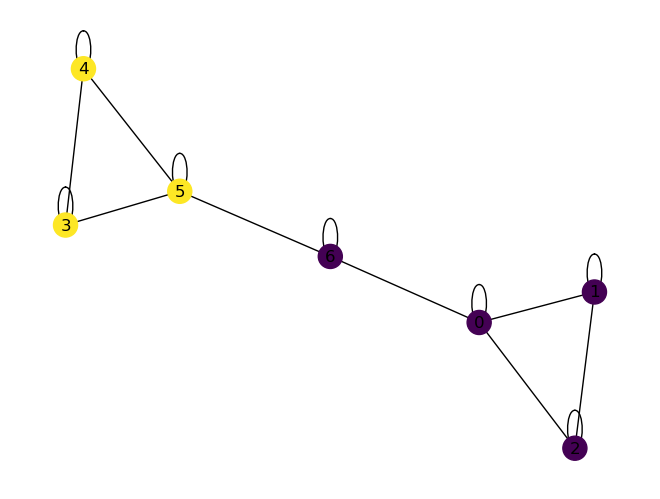

In [8]:
nx.draw(G,with_labels=True, node_color=np.array(labels))

### Using Sklearn

**Semi-supervised learning** is an approach where we use clustering algorithms to generate labels and then use them to train other models. Spectral clustering can be implemented to generate such labels

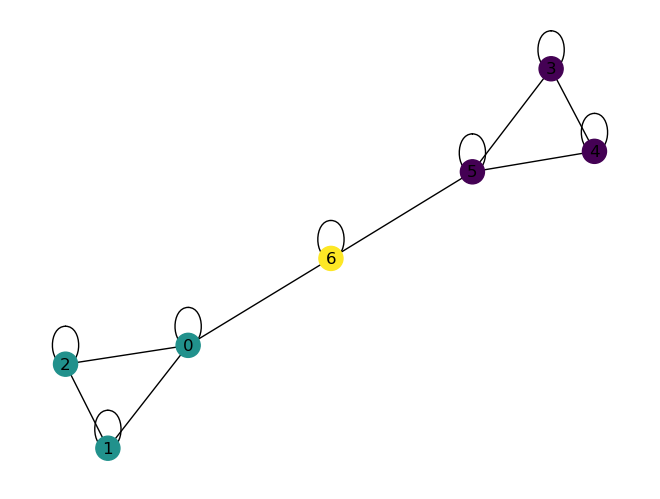

In [9]:
#perform spectral clustering with sklearn
from sklearn.cluster import SpectralClustering
from sklearn import metrics
sc = SpectralClustering(3, affinity='precomputed', n_init=100)
sp_clust=sc.fit(adj_mat_w)
sc_labels=sp_clust.labels_

nx.draw(G,with_labels=True, node_color=sc_labels)

### Spectral clustering on text notes

In [1]:
#set up needed packages
import pandas as pd
import numpy as np
import os
from sentence_transformers import SentenceTransformer

#import first network's data
File ="/home/sako/Data science lessons/Graph Theory/Modern-Graph-Theory-Algorithms-with-Python-main/data/SC_Notes.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(File))
mydata = pd.read_csv(os.path.basename(File),encoding='latin1')

In [2]:
mydata

,Notes,Type
0,"Mangrove ecosystem. Numerous butterflies, liza...",healthy
1,Tropical pines. Scat shows raccoon and coyote ...,healthy
2,Brown grass. Lots of children romping around. ...,unhealthy
3,Sewage and dumped barrels visible in lake. Den...,unhealthy
4,"Gumbolimbo trees, green grass, and pines. Chip...",healthy
5,Large duck population. Many banyan trees. Most...,healthy
6,Green grass. Few trees. Not many animals. Down...,unhealthy
7,Brown grass. A few crocodiles. Few trees. Down...,unhealthy
8,Wide variety of tropical plants and trees. Lar...,healthy
9,Small grass area. Some saplings. Gravel paths....,unhealthy


In [3]:
# clean up empty values
mydata['Notes']=mydata['Notes'].fillna(value=".")

#strip to text for input into BERT model
text_list=list(mydata.Notes)

In [4]:
#get BERT--768 vectors;
# You might need to install sentence-transformer & hf-xet
sbert_model1 = SentenceTransformer('all-mpnet-base-v2')

#encode data with BERT
encoded_text1=sbert_model1.encode(text_list)

In [5]:
encoded_text1.shape

(10, 768)

In [6]:
#make nearest neighbors graph to create adjacency matrix
from sklearn.neighbors import kneighbors_graph
n_adj = kneighbors_graph(encoded_text1, n_neighbors=3).toarray()

In [7]:
n_adj

array([[0., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 1., 0., 0.]])

In [8]:
#run spectral clustering
from sklearn.cluster import SpectralClustering
from sklearn import metrics
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sp_clust=sc.fit(n_adj)
sc_labels=sp_clust.labels_
print(sc_labels)

/home/sako/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:248: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


[1 1 0 1 1 1 0 0 1 0]


In [9]:
mydata['sc_labels'] = sc_labels

In [10]:
mydata.index = range(1,11)

In [11]:
print(mydata.to_string())

                                                                                                               Notes       Type  sc_labels
1                      Mangrove ecosystem. Numerous butterflies, lizards, and insects. Gumbolimbo trees. Soggy soil.    healthy          1
2                            Tropical pines. Scat shows raccoon and coyote populations here. Recent controlled burn.    healthy          1
3                                             Brown grass. Lots of children romping around. Damaged hibiscus plants.  unhealthy          0
4                              Sewage and dumped barrels visible in lake. Dense mangroves. Fish population. Lizards.  unhealthy          1
5                    Gumbolimbo trees, green grass, and pines. Chipmunks and squirrels sighted. Strong root systems.    healthy          1
6                 Large duck population. Many banyan trees. Mostly green grass. Some gumbolimbo trees. Some iguanas.    healthy          1
7               Green grass

In [12]:
mydata['marker']= mydata.index.astype(str)+"_"+mydata.Type.replace({"healthy":"H","unhealthy":'UnH'})
mydata

,Notes,Type,sc_labels,marker
1,"Mangrove ecosystem. Numerous butterflies, liza...",healthy,1,1_H
2,Tropical pines. Scat shows raccoon and coyote ...,healthy,1,2_H
3,Brown grass. Lots of children romping around. ...,unhealthy,0,3_UnH
4,Sewage and dumped barrels visible in lake. Den...,unhealthy,1,4_UnH
5,"Gumbolimbo trees, green grass, and pines. Chip...",healthy,1,5_H
6,Large duck population. Many banyan trees. Most...,healthy,1,6_H
7,Green grass. Few trees. Not many animals. Down...,unhealthy,0,7_UnH
8,Brown grass. A few crocodiles. Few trees. Down...,unhealthy,0,8_UnH
9,Wide variety of tropical plants and trees. Lar...,healthy,1,9_H
10,Small grass area. Some saplings. Gravel paths....,unhealthy,0,10_UnH


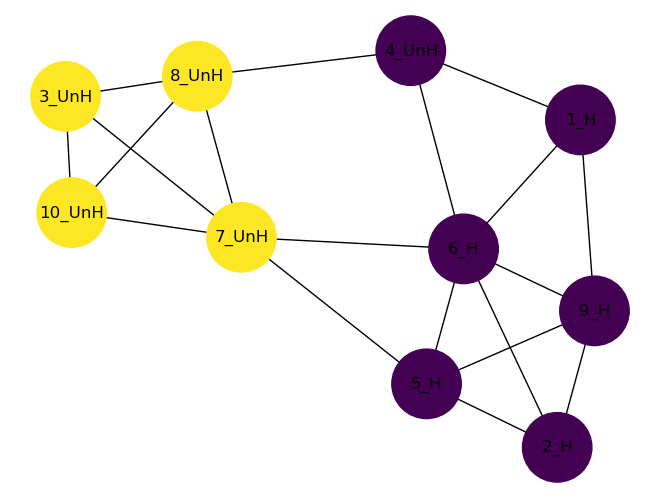

In [139]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create graph from adjacency matrix
G = nx.from_numpy_array(n_adj)

labels = mydata['marker']

# Relabel nodes using your predefined labels
mapping = {i: label for i, label in enumerate(labels)}
G = nx.relabel_nodes(G, mapping)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2500, node_color=sc_labels)
plt.show()

**NOTE**: You can see that *node 4* for is "unhealthy" but still classified healthy. It's not always perfect, you can try changing the cluster size for the KNN, or use another embedder.


### Train a model using the Semi-supervised labels

In [165]:
#create training dataset for supervised learning
#turn BERT embedding into array
BERT_array1=np.array([x for x in encoded_text1])

#convert to dataframes
BERT_df1=pd.DataFrame(BERT_array1)
BERT_df1.index  = range(1,11)

In [166]:
#create KNN classifier and test accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#get predictors and outcome
BERT_df1['Type']=mydata['Type']
df_train, df_test = train_test_split(BERT_df1,test_size=0.2, random_state=0)
X = df_train.iloc[:,0:767]
y = df_train.iloc[:,768]
X_test = df_test.iloc[:,0:767]
y_test = df_test.iloc[:,768]

In [169]:
#create KNN classifier and print accuracy
eu=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
eu.fit(X.fillna(0),y.fillna(0))

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [170]:
print(eu.score(X_test,y_test))

1.0


Score show that it is perfect ... Butlet's not get ahead of ourselves

### Let's build a predictor

In [190]:
sentences = [
    "The coral reefs in this marine reserve are thriving, supporting a diverse range of fish and algae.",
    "Lush green forests with minimal human intervention offer a safe habitat for countless endangered species.",
    "Wetlands naturally purify water by filtering out pollutants and providing shelter to migratory birds.",
    "Urban parks with abundant trees improve air quality and provide vital green spaces for communities.",
    "Organic farms that use crop rotation and composting help maintain long-term soil health.",
    "The lake has become lifeless due to industrial waste dumping, with oxygen levels too low to support fish.",
    "Years of illegal logging have left the once-vibrant rainforest fragmented and vulnerable to erosion.",
    "Plastic pollution has choked marine life, with turtles and seabirds often found tangled or starved.",
    "Excessive pesticide use has led to a dramatic decline in pollinators like bees and butterflies.",
    "Smog from nearby factories has turned the city’s air toxic, causing respiratory problems in children."
]

ground_truths = np.array([
    "healthy",
    "healthy",
    "healthy",
    "healthy",
    "healthy",
    "unhealthy",
    "unhealthy",
    "unhealthy",
    "unhealthy",
    "unhealthy"
])

In [184]:
x_embd=sbert_model1.encode(sentences)

In [186]:
x_embd.shape

(10, 768)

In [195]:
res = eu.predict(x_embd[:,0:767])
res

array(['healthy', 'healthy', 'healthy', 'unhealthy', 'healthy',
       'unhealthy', 'healthy', 'unhealthy', 'unhealthy', 'unhealthy'],
      dtype=object)

In [197]:
(ground_truths == res).sum()/res.shape[0]

0.8